In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

In [21]:
pwd

'C:\\Users\\Haro\\Regresion Lineal\\Vehicle'

In [22]:
Datos = pd.read_csv(r'C:\Users\Haro\Regresion Lineal\HeartCleveland\heart_cleveland_upload.csv')

In [24]:
print(Datos.head(298))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [25]:
descripcion = Datos.describe()
print(descripcion)

              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.9415

In [31]:
plt.figure(figsize=(200, 100))

sns.boxplot(x='trestbps', data=Datos) 

plt.title('Datos Faltantes y Atípicos', fontsize=298)

plt.show()

In [32]:
columnas_nuevas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

registros_con_cero = {}
for columna in columnas_nuevas:
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

for columna, cantidad in registros_con_cero.items():
    print(f"Cantidad de registros con cero en la columna '{columna}': {cantidad}")

Cantidad de registros con cero en la columna 'age': 0
Cantidad de registros con cero en la columna 'sex': 96
Cantidad de registros con cero en la columna 'cp': 23
Cantidad de registros con cero en la columna 'trestbps': 0
Cantidad de registros con cero en la columna 'chol': 0
Cantidad de registros con cero en la columna 'fbs': 254
Cantidad de registros con cero en la columna 'restecg': 147
Cantidad de registros con cero en la columna 'thalach': 0
Cantidad de registros con cero en la columna 'exang': 200
Cantidad de registros con cero en la columna 'oldpeak': 0
Cantidad de registros con cero en la columna 'slope': 139
Cantidad de registros con cero en la columna 'ca': 174
Cantidad de registros con cero en la columna 'thal': 164
Cantidad de registros con cero en la columna 'condition': 160


In [33]:
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['sex'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['sex'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['sex'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['sex'].replace(0,Datos['exang'].mean())
Datos['slope']=Datos['sex'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['sex'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['sex'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['sex'].replace(0,Datos['condition'].mean())

In [34]:
columnas_nuevas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']

registros_con_cero = {}
for columna in columnas_nuevas:
    registros_con_cero[columna] = (Datos[columna].astype(str) == '0').sum()

for columna, cantidad in registros_con_cero.items():
    print(f"Registros con cero en la columna '{columna}': {cantidad}")

Registros con cero en la columna 'age': 0
Registros con cero en la columna 'sex': 0
Registros con cero en la columna 'cp': 0
Registros con cero en la columna 'trestbps': 0
Registros con cero en la columna 'chol': 0
Registros con cero en la columna 'fbs': 0
Registros con cero en la columna 'restecg': 0
Registros con cero en la columna 'thalach': 0
Registros con cero en la columna 'exang': 0
Registros con cero en la columna 'oldpeak': 0
Registros con cero en la columna 'slope': 0
Registros con cero en la columna 'ca': 0
Registros con cero en la columna 'thal': 0
Registros con cero en la columna 'condition': 0


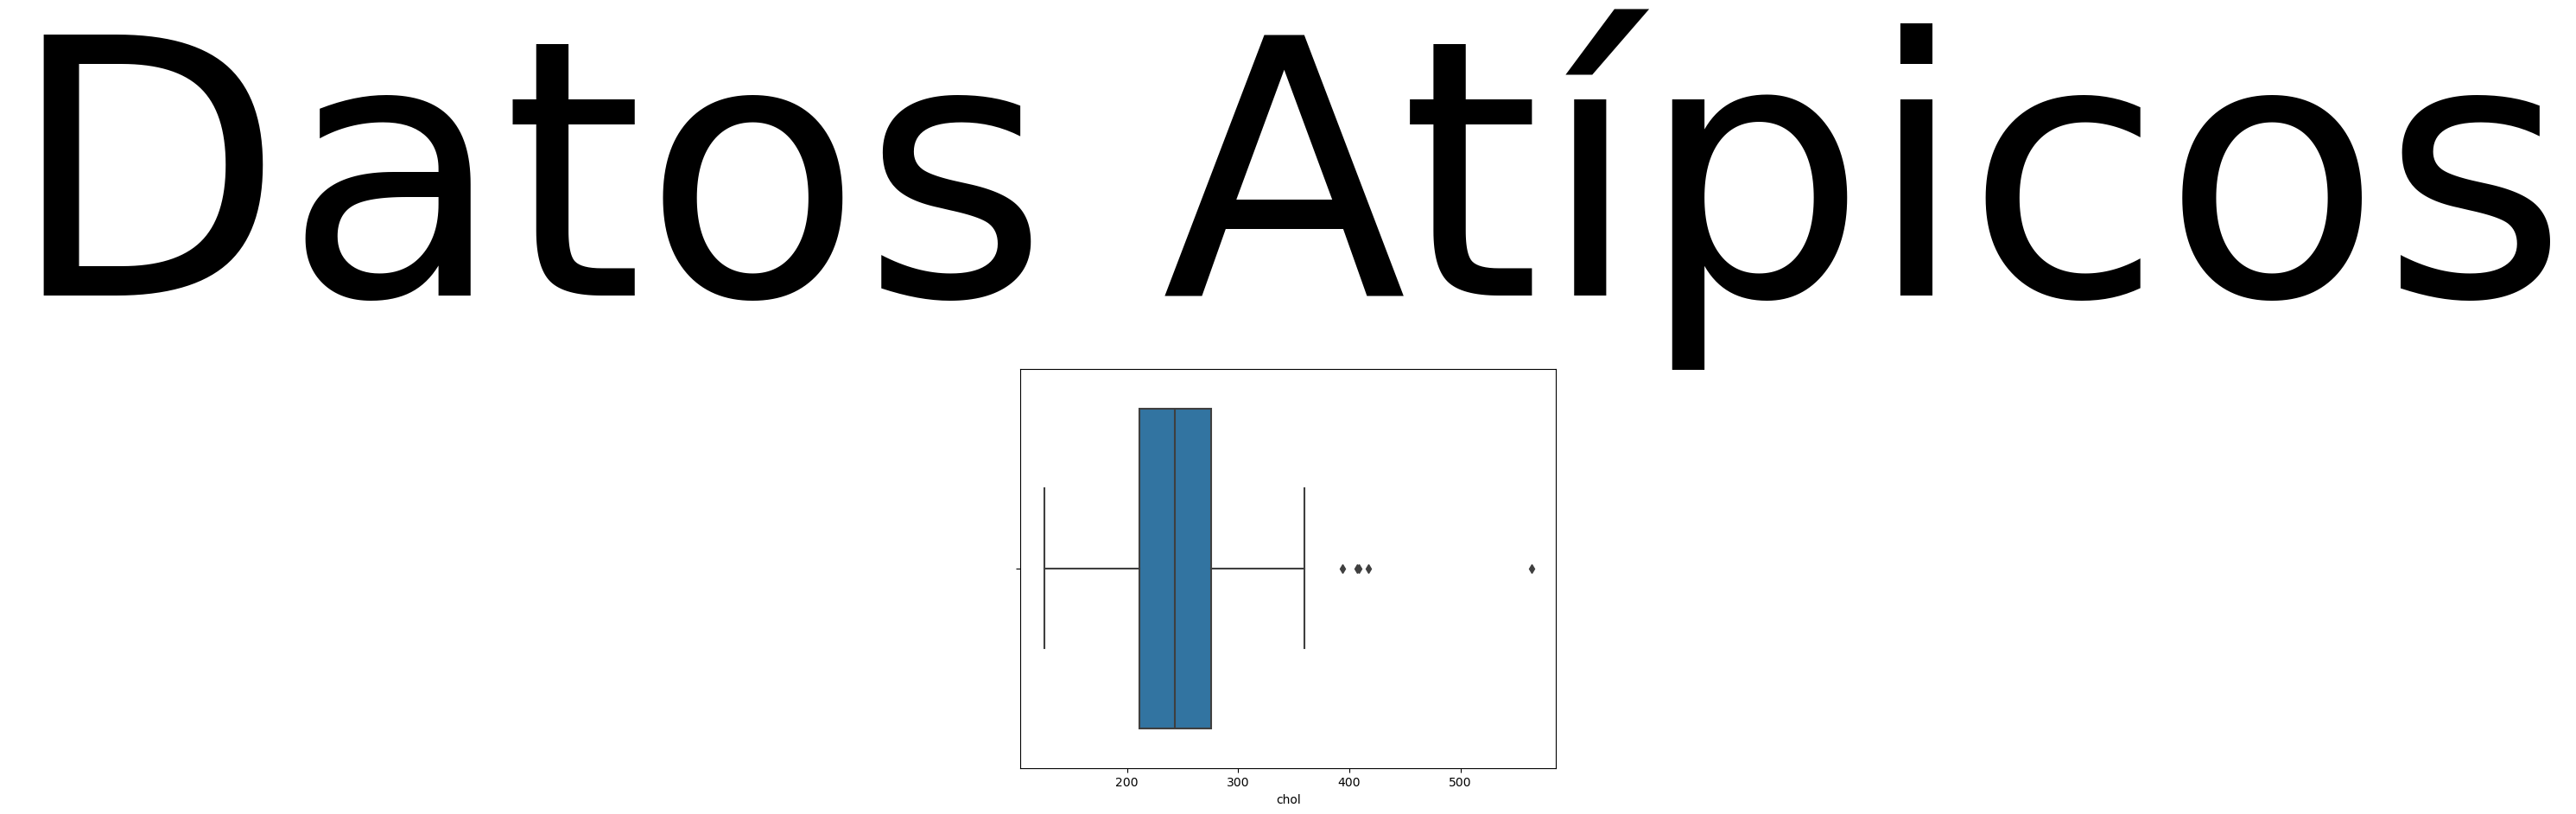

In [37]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='chol', data=Datos) 

plt.title('Datos Atípicos', fontsize=298)

# Mostrar el gráfico
plt.show()

In [38]:
nivel_minimo=200
nivel_maximo=500
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 49


In [39]:
Datos=Datos [(Datos['chol']<nivel_maximo)&(Datos['chol']>nivel_minimo)]

In [40]:
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [41]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        247 non-null    int64  
 1   sex        247 non-null    float64
 2   cp         247 non-null    float64
 3   trestbps   247 non-null    int64  
 4   chol       247 non-null    int64  
 5   fbs        247 non-null    float64
 6   restecg    247 non-null    float64
 7   thalach    247 non-null    int64  
 8   exang      247 non-null    float64
 9   oldpeak    247 non-null    float64
 10  slope      247 non-null    float64
 11  ca         247 non-null    float64
 12  thal       247 non-null    float64
 13  condition  247 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 28.9 KB


In [42]:
Datos['chol'].value_counts()

chol
234    6
212    5
254    5
204    5
269    5
      ..
321    1
215    1
322    1
237    1
247    1
Name: count, Length: 118, dtype: int64

In [44]:
Datos[['chol']].head(50)

,chol
0,234
1,239
2,226
3,282
4,211
5,227
6,233
7,234
8,240
9,270


In [45]:
from sklearn.model_selection import train_test_split

X = Datos.drop('chol', axis=1)  # Características
Y = Datos['chol']  # Variable objetivo

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [46]:
print (X_train)

     age       sex        cp  trestbps       fbs   restecg  thalach     exang  \
121   51  0.676768  0.676768       140  0.676768  0.676768      142  0.676768   
238   56  0.676768  0.676768       134  0.676768  0.676768      150  0.676768   
153   37  1.000000  1.000000       130  1.000000  1.000000      187  1.000000   
81    67  0.676768  0.676768       152  0.676768  0.676768      172  0.676768   
241   55  1.000000  1.000000       160  1.000000  1.000000      145  1.000000   
..   ...       ...       ...       ...       ...       ...      ...       ...   
126   50  1.000000  1.000000       140  1.000000  1.000000      163  1.000000   
16    52  1.000000  1.000000       152  1.000000  1.000000      178  1.000000   
108   54  1.000000  1.000000       120  1.000000  1.000000      147  1.000000   
216   58  1.000000  1.000000       128  1.000000  1.000000      130  1.000000   
122   51  0.676768  0.676768       130  0.676768  0.676768      149  0.676768   

     oldpeak     slope     

In [47]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)

In [48]:
print (Y_test)

38     236
6      233
219    225
100    224
189    294
      ... 
200    258
113    201
187    267
87     335
96     218
Name: chol, Length: 62, dtype: int64


In [49]:
print (Prediccion)

[230 282 228 250 269 269 327 234 298 226 282 234 298 229 269 204 204 282
 274 234 204 265 298 229 298 269 282 226 226 240 204 298 204 234 283 250
 234 298 204 236 204 226 204 234 282 204 234 269 230 282 269 236 282 282
 204 269 283 254 283 254 234 254]


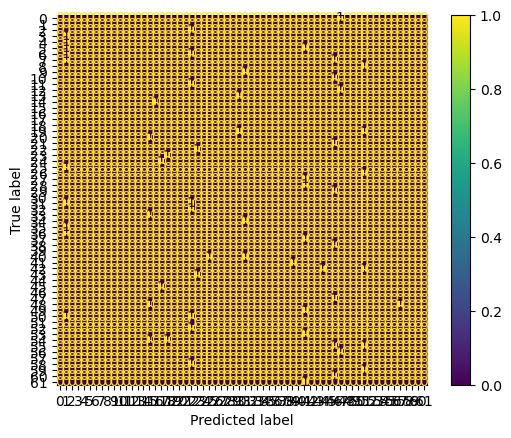

In [59]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()